In [1]:
import sys, os
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
%matplotlib inline

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on 
%pycodestyle_off

In [4]:
# !pip install advent-of-code-data
# https://github.com/wimglenn/advent-of-code-data #for input parsing/loading
from aocd import get_data  # simple, #get_data(day=24, year=2021)
from aocd.models import Puzzle
import datetime
today = datetime.datetime.now().day
puzzle = Puzzle(year=2022, day=8)


In [5]:
#  run ONCE
#print(puzzle.user)
print(puzzle.input_data_fname[60:])
print(puzzle.example_input_data_fname[60:])


iA = puzzle.input_data
iE = puzzle.example_data
print(iE)
try:
    print(puzzle.easter_egg)
except:
    pass

2022_08_input.txt
2022_08_example_input.txt
30373
25512
65332
33549
35390


In [6]:
def parse(i = None):

    lines = i.split('\n')
    nrows = len(lines)
    ncols = len(lines[0])
    grid =np.zeros([nrows,ncols])

    #print(nrows,ncols)
    for x in range(nrows):
        for y in range(ncols):
            grid[x][y] = int(lines[x][y])
    print('{}x{} grid build'.format(nrows,ncols))
    return grid #print(grid)

def OBSOLETE_calc_visible(grid):
    (ncols,nrows)=grid.shape
    visible = set([])
    for x in range(nrows):
        for y in range(ncols):
            is_edge = False
            row = grid[x,:]    
            col = grid[:,y]
            if (x==0) or (x==(nrows-1)):
                is_edge = True
                visible.add((0,          y)) 
                visible.add((0,          ncols-1-y))
                visible.add((ncols-1,     y)) 
                visible.add((ncols-1,     ncols-1-y))
                    
            if (y==0) or (y == (nrows -1)):
                is_edge = True
                visible.add((x         , 0)) 
                visible.add((nrows-1-x ,0))
                visible.add((x         , ncols-1))
                visible.add((nrows-1-x ,ncols-1))
            if not(is_edge):
                print(x,y)
                if y==1 and np.max(row[y-1])< row[y]:
                    visible.add((x,y)) 
                elif x==1 and np.max(col[x-1])< col[x]:
                    visible.add((x,y)) 
                
                elif x == nrows-2 and np.max(col[-x+1]) <col[-x] :
                        visible.add(((nrows-x-1),+y)) 
                elif y == nrows-2 and np.max(row[-y+1]) < row[-y]:
                    visible.add((x,ncols-y-1))
                elif np.max(row[:y-1])< row[y]:
                    visible.add((x,y)) 
                elif np.max(row[-y+1:]) < row[-y]:
                    visible.add((x,ncols-y-1))
                elif np.max(col[:x-1])   < col[x]:
                        visible.add((x,y)) 
                elif np.max(col[-x+1:]) <col[-x] :
                        visible.add(((nrows-x-1),+y)) 
    return len(visible),visible

def index_of_visibles(row,reverse= False):#ow_e = grid[x,:]  
    if reverse:
        row=np.flip(row)
    #print(row)
    index_visible=[]
    current =-99
    for index in range(0,len(row)):
        #print(index)
        if (current < row[index]): #then visible!
            index_visible.append(index) 
            current =row[index] # in order of input. 
    #print(index_visible)
    if reverse: 
        ncols = len(row)
        index_reversed = [ncols-1-index for index in index_visible]
        return index_reversed
    else:
        return index_visible

index_of_visibles(np.array([1,2,3,2,6,4]),True)


[5, 4]

In [7]:
import copy
def calc_maskmap(grid):
    (ncols,nrows)=grid.shape
    maskmap = np.ones(grid.shape)*-1
    #print('empty maskmap')
    for x in range(nrows):
        
        row_e = grid[x,:]    
        visible_index1 =index_of_visibles(row_e)
        #print('e',row_e)
        #print('vis index1',visible_index1)

        row_i = np.flip(row_e)
        #print('i',row_i)
        visible_index2 =index_of_visibles(row_e,reverse=True)
        #print('vis index2',visible_index2)
        #print(maskmap[x,:].shape,visible_index1.shape,visible_index2.shape)
        visible_indiches=set()
        visible_indiches.update(visible_index1)
        visible_indiches.update(visible_index2)
        #print(visible_indiches)
        if visible_indiches is not None:
            #print('rows', x ,visible_indiches)
            for i in list(visible_indiches):
                #print('assing')
                maskmap[x,i]= 3
                
    
    for y in range(ncols):
        col_e = grid[:,y]    
        visible_index3 =index_of_visibles(col_e,reverse=True)
        #print(col_e)
        col_i = np.flip(col_e)
        visible_index4 = index_of_visibles(col_e)
        #print(col_i,col_e)
        visible_indiches=set()
        #print('cols', y ,'A',visible_index3)
        visible_indiches.update(visible_index3)
        #print('cols', y, 'B',visible_index4)
        visible_indiches.update(visible_index4)
        #print(visible_indiches)
        
        if visible_indiches is not None:
            #print('cols', y ,visible_indiches)
            for i in list(visible_indiches):
                maskmap[i,y] = 1
        
    print('full  maskmap')
    #print(maskmap)
    return(maskmap)
                #eval left
                #eval right


In [8]:
grid =  parse(iE)
#print(grid)
mask=calc_maskmap(grid)
print('mask_output')
#print(mask)
answA = sum(sum(mask>0))
print(answA)

#print(answA) #,treenrs)
# max 4000..

5x5 grid build
full  maskmap
mask_output
21


In [455]:
puzzle.answer_a = answA # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


In [16]:
# test and solve part B
# iA,iE,
def calc_scenic(x,y,grid): # x,y not at edges
    val = grid[x,y] # curr height. # example 5
    row = grid[x,:] # example [2 5 5 1 2] 
    col = grid[:,y] # example [3 5 3 5 3] 
    #print(row)
    #print(col)
    #print('val',val)
    a,b,c,d =0,0,0,0
    
    #a,b,c,d =-1,-1,-1,-1
    
    names =['a','b','c','d'] #['left','right','up','down']
    vals = [a,b,c,d]
    commut = [x,x,y,y]
    direction = [-1,1,-1,1]
    scenic_view_ =dict(zip(names, vals))
    commut_ = dict(zip(names, commut))
    dir_ =dict(zip(names, direction))
    
    
    #rangr = np.arange(0,len(row)) # leave out first and last => thats in the break.
    for name in names:
        next_pos=commut_[name]
        keep_looking = True
        while keep_looking:
            next_pos += dir_[name] # move one step in direction. 
            if next_pos in range(len(row)):
                #print(name)
                if name == 'a':
                    next_val =row[next_pos]
                elif name == 'b':
                    next_val =row[next_pos]
                elif name == 'c':
                    next_val =col[next_pos]
                elif name == 'd':
                    next_val =col[next_pos]
                # we always see a tree there. => continue.
                
                if name == 'a':
                    a +=1 # to left #a,b,c,d
                elif name == 'b':
                    b +=1 # to left #a,b,c,d
                elif name == 'c':
                    c +=1 # to left #a,b,c,d
                elif name == 'd':
                    d +=1 # to left #a,b,c,d
                    
                if  next_val>= val: #equal or larger tree => stop
                    keep_looking = False
                elif next_pos==0 or next_pos == len(row)-1: #also at end of field =>
                    keep_looking = False
                else:
                    keep_looking = False
            else:
                keep_looking = False

    return a*b*c*d,a,b,c,d


In [60]:


# go over each row
# for every element
#check element -1 to 0
# while tree > home_tree
# count +1 
#else stop & store;

grid =  parse(iE)
print(grid)
row=grid[1,:]
col = grid[:,1]
print('row',grid[1,:])
print('col',grid[:,1])
smallgrid=np.zeros([len(col),len(row)])
for i in np.arange(1, len(col)):

    stop =False
    counter = 0
    while not stop:
        for j in np.flip(np.arange(0,i)):
            print(j,i)
            print('h:' ,row[j], row[i])
            if (row[j]) < row[i]:
                counter =+1
                print('+1:',counter)
            elif (row[j]) >=row[i]: 

                stop =True
        else:
            
            stop =True
    else:
        smallgrid[1,i] = counter
        
print(smallgrid)


      
    
full_monty = False
if full_monty:
    print()
    all_views_ = []
    for i in range(grid.shape[0]):
        for j in  range(grid.shape[1]):
            n=calc_scenic(i,j,grid)
            all_views_.append(n[0]) #[(i,j),n])

    print('max scenic', max(all_views_))
#print(all_views_) 
# 141570 too low.

5x5 grid build
[[3. 0. 3. 7. 3.]
 [2. 5. 5. 1. 2.]
 [6. 5. 3. 3. 2.]
 [3. 3. 5. 4. 9.]
 [3. 5. 3. 9. 0.]]
row [2. 5. 5. 1. 2.]
col [0. 5. 5. 3. 5.]
0 1
h: 2.0 5.0
+1: 1
1 2
h: 5.0 5.0
0 2
h: 2.0 5.0
+1: 1
2 3
h: 5.0 1.0
1 3
h: 5.0 1.0
0 3
h: 2.0 1.0
3 4
h: 1.0 2.0
+1: 1
2 4
h: 5.0 2.0
1 4
h: 5.0 2.0
0 4
h: 2.0 2.0
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [58]:
def visibility_to_left(row=[1,2,3,4,5,6], at_pos=4):
    
    if at_pos == 0:
        return 0
    else:
        left_slice = list(row[:at_pos])
        left_slice.reverse()
        #left_slice.append(99)
        #print(left_slice)

        count =0
        for i in left_slice:
            #print('i',i)
            if i <row[at_pos]:
                count += 1
            else:
                count += 1
                return count
        return count
    

def visibility_to_right(row=[1,2,3,4,5,6], at_pos=3):
    # DOES NOT work for at_pos == 0!!
    if at_pos == len(row)-1:
        return 0
    else:
        right_slice = list(row[at_pos+1:])
        #right_slice.append(99)
        #print(right_slice)
        #right_slice.reverse()


        count =0
        #print(right_slice)
        for i in right_slice:
            #rint('i',i)
            if i <row[at_pos]:
                count += 1
            else:
                count += 1
                return count
        return count


In [54]:
row =  [3., 3., 5., 4., 9.]

for j in range(len(row)):
    print(visibility_to_right(row,j))
    
    

1
1
2
1
0


In [61]:

grid =  parse(iA)
print(grid)
nrows = grid.shape[0]
ncols = grid.shape[1]
visibility_1 = np.zeros(grid.shape)
visibility_2 = np.zeros(grid.shape)
visibility_3 = np.zeros(grid.shape)
visibility_4 = np.zeros(grid.shape)
for i in range(1,nrows-1):
    row=grid[i,:]
    for j in range(1,ncols):
        
        visibility_1[i,j]=visibility_to_left(row, at_pos=j)
        visibility_2[i,j]=visibility_to_right(row,at_pos=j)
    
for j in range(1,ncols-1):
    col=grid[:,j]
    for i in range(1,nrows):
        
        visibility_3[i,j]=visibility_to_left( col, at_pos=i)
        visibility_4[i,j]=visibility_to_right(col,at_pos=i)

print(visibility_1)
print(visibility_2)
print(visibility_3)
print(visibility_4)
print('matmult')
full_visib = visibility_1 * visibility_2 * visibility_3 * visibility_4
print(full_visib)
answ_B= int(np.max(np.max(full_visib)))
print('answ_B',answ_B)

99x99 grid build
[[2. 1. 3. ... 0. 0. 1.]
 [0. 3. 2. ... 2. 2. 2.]
 [2. 1. 1. ... 3. 0. 2.]
 ...
 [3. 2. 3. ... 1. 2. 3.]
 [0. 2. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 3. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 5. 1. 2.]
 ...
 [0. 1. 2. ... 1. 2. 6.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 4. 1. ... 1. 1. 0.]
 [0. 1. 2. ... 2. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 5. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 2. 1. 0.]
 ...
 [0. 3. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 7. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 4. 2. ... 1. 2. 0.]
 [0. 1. 1. ... 3. 1. 0.]
 ...
 [0. 1. 2. ... 1. 2. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
matmult
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 16.  2. ...  1.  2.  0.]
 [ 0.  1.  2. ... 60.  1.  0.]
 ...
 [ 0.  3.  4. ...  1.  4.  0.]
 [ 0.  5.  1. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
ans

In [ ]:
,

In [ ]:
# test and solve part B, use inputs & test inputs.

141570


In [62]:
puzzle.answer_b = answ_B # answB # this submits!

KeyboardInterrupt: 

[3.0, 0.0, 3.0, 7.0, 3.0]

In [12]:
import copy
def calc_visibilty_from_grid(grid):
    nrows = grid.shape[0]
    ncols = grid.shape[1]

    grod = np.zeros(grid.shape)
    v1 = np.zeros(grid.shape)
    v2 = np.zeros(grid.shape)
    v3 = np.zeros(grid.shape)
    v4 = np.zeros(grid.shape)

    for i in range(nrows):
        row = grid[i,:]
        
        if 1: #if not(i ==0) and not(i==nrows-1):
            #print('row',row)
            for j in range(ncols):
                val= row[j]
                if 1: #if not(j ==0) and not(j==nrows-1):
                    count = 0
                    stop =  False
                    n  = j
                    m  = j               
                    while not (stop):
                        n -= 1 # go left
                        count += 1
                        if n<= -1:
                            stop=True
                        elif row[n]>=val:
                            stop=True
                    v1[i,j] = copy.deepcopy(count)


                    count = 0
                    stop =  False


                    while not (stop):
                        m += 1 # go right
                        count += 1
                        if m>= ncols-1-1:
                            stop=True
                        elif row[m]>=val:
                            stop=True
                    v2[i,j] = copy.deepcopy(count )
        else: 
            pass #print('row ignored')
    for j in range(ncols):
        col = grid[:,j]
        if 1:
            #if not(j ==0) and not(j==ncols-1):    
            #print('col',col)
            for i in range(nrows):
                val = col[i]
                if 1: #if not(i ==0) and not(i==ncols):
                    count = 0
                    stop =  False
                    n  = i
                    m  = i
                    while not (stop):
                        n -= 1 # go left
                        count += 1
                        if n<= -1:
                            stop=True
                        elif col[n]>=val:
                            stop=True
                    v3[i,j] = copy.deepcopy(count)


                    count = 0
                    stop =  False

                    while not (stop):
                        m += 1 # go right
                        count += 1
                        #print(m)
                        if m>= ncols-1-1:
                            stop=True
                        elif col[m]>=val:
                            stop=True
                    v4[i,j] = copy.deepcopy(count )
        else: 
            pass #print('col ignored')
    return v1,v2,v3,v4



grid =  parse(iA)
grod=np.zeros(grid.shape)
print(grid.shape)
#print(grid)
v1,v2,v3,v4 = calc_visibilty_from_grid(grid)
for i in range(nrows):
    for j in range(ncols):
        grod[i,j]=v1[i,j]*v2[i,j]*v3[i,j]*v4[i,j]
if 0:
    print('grod')        
    print(grod)        
    print('left:')
    print(v1)        

    print('right:')
    print(v2)        

    print('up:')
    print(v3)        

    print('down:')
    print(v4)        

99x99 grid build
(99, 99)


In [13]:
answ_B=int(np.max(np.max(grod)))
print(answ_B)

90


In [289]:
puzzle.answer_b = answ_B

wrong answer: 64


That's not the right answer.  If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit.  Because you have guessed incorrectly 6 times on this puzzle, please wait 5 minutes before trying again. (You guessed 64.) [Return to Day 8]


C:\temp\ipykernel_3312\3126089795.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


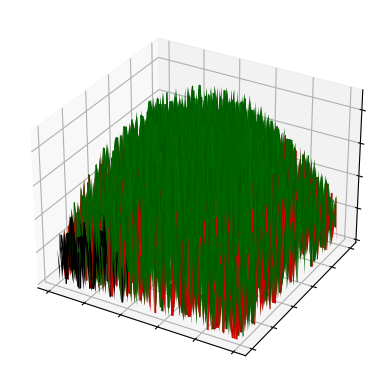

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Some sample data
x_side = np.arange(1, 100, 1)
y_side = np.arange(1, 100, 1)
X, Y = np.meshgrid(x_side,y_side)

# Fake mountains
Z = grid/10
# Assign colors based off some user-defined condition
COLORS = np.empty(X.shape, dtype=str)
COLORS[:,:] = 'g'
COLORS[(Z>.8) * (Z<.9)] = 'r'
COLORS[Z<.2] = 'r'
COLORS[X+Y*10 < 50] = 'k'

# 3D surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=COLORS, rstride=1, cstride=1,
        linewidth=0)
plt.tick_params(left = False, right = False , labelleft = False , labelright = False, labelbottom = False    )
plt.show()

In [67]:
plt.savefig("aoc_8b.png",dpi=150)

<Figure size 640x480 with 0 Axes>